**Uploading and viewing datasets**

To start, we need to import the relevant libraries and upload our datasets. 

In [2]:
!mkdir analysis #creates a folder to put all the datasets

In [3]:
import pandas as pd #imports a library so we can conduct statistical analysis 
import io

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 

In [4]:
from google.colab import files #allows us to import a file 
qual = files.upload()

Saving no_qualifation_data.csv to no_qualifation_data.csv


In [5]:
qual_df = pd.read_csv(io.BytesIO(qual['no_qualifation_data.csv'])) #giving the dataset a name

Now that the dataset has been imported, we can see its contents. This dataset shows the % of people without qualifications between 2015-2017, as well as the mean across the years. 

In [6]:
qual_df.head() #.head() can be used to display the first few rows of the dataset

,Borough,2015: % of people aged 25-64 with no qualifications,2016: % of people aged 25-64 with no qualifications,2017: % of people aged 25-64 with no qualifications,av 2015-2017
0,Barking and Dagenham,12.4,15.7,14.3,14.133333
1,Barnet,3.8,6.3,5.1,5.066667
2,Bexley,11.0,5.7,5.3,7.333333
3,Brent,6.8,6.5,7.8,7.033333
4,Bromley,4.5,2.9,3.9,3.766667


If you want to analyse the dataset, you can use .describe to get summary statistics, as shown here:

In [7]:
qual_df.describe()  #used to get summary statistics for a datset 

,2015: % of people aged 25-64 with no qualifications,2016: % of people aged 25-64 with no qualifications,2017: % of people aged 25-64 with no qualifications,av 2015-2017
count,32.000000,32.000000,32.000000,32.000000
mean,7.371875,6.468750,6.506250,6.782292
std,2.910740,2.619953,3.507866,2.733438
min,2.700000,1.800000,2.000000,2.166667
25%,4.775000,5.050000,4.200000,4.750000
50%,6.850000,6.300000,5.800000,6.766667
75%,10.225000,7.625000,7.875000,8.016667
max,12.400000,15.700000,16.300000,14.133333


**Cleaning datasets**

Since we only need the average over the years, we can clean the dataset to get rid of the extra information. Here we will choose the borough names and overall average % only. We will also rename any columns that need to be made clearer.

In [13]:
qual_avg = qual_df[['Borough','av 2015-2017']].rename(columns={'av 2015-2017':'No qualifications'}) 
qual_avg.head()

,Borough,No qualifications
0,Barking and Dagenham,14.133333
1,Barnet,5.066667
2,Bexley,7.333333
3,Brent,7.033333
4,Bromley,3.766667


Now, we are uploading the dataset for the other variables. Just like we did above, we will name the uploaded datasets, and clean them to only look at the data we need.

In [14]:
particip = files.upload() 
particip_df = pd.read_csv(io.BytesIO(particip['participation_data.csv']))

Saving participation_data.csv to participation_data.csv


In [13]:
particip_df.head()

,Borough,"Spent time doing a creative, artistic, theatrical or music activity or a craft","Attended an event, performance or festival involving creative, artistic, dance, theatrical or music activity",Used a public library service,Attended a museum or gallery,Dance,Creative or artistic dance
0,Barking and Dagenham,25.15,35.14,33.82,32.72,21.57,5.24
1,Barnet,34.79,54.65,37.24,56.61,23.87,4.78
2,Bexley,28.14,48.72,40.01,38.19,21.10,5.04
3,Brent,27.57,45.67,37.60,43.94,20.67,7.00
4,Bromley,37.47,60.44,41.01,56.23,24.21,5.79


In [17]:
ethnic = files.upload()
ethnicity_df = pd.read_csv(io.BytesIO(ethnic['ethnicity_data.csv']))

Saving ethnicity_data.csv to ethnicity_data.csv


In [18]:
ethnicity_df.head()

,Borough,2015 white,2015 asian,2015 black,2015 mixed/other,2016 white,2016 asian,2016 black,2016 mixed/other,2017 white,2017 asian,2017 black,2017 mixed/other,avg white,avg asian,avg black,avg mixed/other
0,Barking and Dagenham,95000,41000,52000,14000,106000,41000,47000,13000,104000,48000,41000,17000,101667,43333,46667,14667
1,Barnet,247000,54000,29000,43000,233000,68000,22000,55000,264000,57000,14000,49000,248000,59667,21667,49000
2,Bexley,195000,15000,23000,7000,192000,18000,28000,5000,194000,16000,26000,8000,193667,16333,25667,6667
3,Brent,108000,108000,55000,50000,117000,106000,53000,49000,121000,101000,61000,44000,115333,105000,56333,47667
4,Bromley,259000,16000,31000,17000,272000,17000,23000,13000,255000,26000,18000,27000,262000,19667,24000,19000


In [22]:
ethnicity_df_avg = ethnicity_df[['Borough','avg white', 'avg asian', 'avg black', \
                                 'avg mixed/other']].rename(columns={'avg white':'White',\
                                 'avg asian':'Asian', 'avg black': 'Black', \
                                 'avg mixed/other':'Mixed/Other'})
ethnicity_df_avg.head()

,Borough,White,Asian,Black,Mixed/Other
0,Barking and Dagenham,101667,43333,46667,14667
1,Barnet,248000,59667,21667,49000
2,Bexley,193667,16333,25667,6667
3,Brent,115333,105000,56333,47667
4,Bromley,262000,19667,24000,19000


In [24]:
income = files.upload()
income_df = pd.read_csv(io.BytesIO(income['income_deprivation_data.csv'])) 

Saving income_deprivation_data.csv to income_deprivation_data.csv


In [25]:
income_df.head()

,Borough,2015 IMD AV SCORE,2019 IMD AV SCORE,av imd 2015-2019
0,Barking and Dagenham,34.6,0.2,17.4
1,Barnet,17.8,0.1,9.0
2,Bexley,16.2,0.1,8.1
3,Brent,26.7,0.2,13.4
4,Bromley,15.2,0.1,7.6


In [26]:
income_df_avg = income_df[['Borough','av imd 2015-2019']].rename(columns={'av imd 2015-2019': 'Income deprivation'})
income_df_avg.head()

,Borough,Income deprivation
0,Barking and Dagenham,17.4
1,Barnet,9.0
2,Bexley,8.1
3,Brent,13.4
4,Bromley,7.6


**Merging datasets**

Once the datasets have been cleaned, we need to merge them together to create one main dataset.

In [27]:
df_merged1 = income_df_avg.merge(ethnicity_df_avg, left_index=True, right_index=True) #decides what datasets to merge and where to merge the datasets
df_merged2 = particip_df.merge(qual_avg, left_index=True, right_index=True) 
df_socio = qual_avg.merge(df_merged1, left_index=True, right_index=True)
df_merged = df_merged2.merge(df_merged1, left_index=True, right_index=True)
df_merged.head()

,Borough_x_x,"Spent time doing a creative, artistic, theatrical or music activity or a craft","Attended an event, performance or festival involving creative, artistic, dance, theatrical or music activity",Used a public library service,Attended a museum or gallery,Dance,Creative or artistic dance,Borough_y_x,No qualifications,Borough_x_y,Income deprivation,Borough_y_y,White,Asian,Black,Mixed/Other
0,Barking and Dagenham,25.15,35.14,33.82,32.72,21.57,5.24,Barking and Dagenham,14.133333,Barking and Dagenham,17.4,Barking and Dagenham,101667,43333,46667,14667
1,Barnet,34.79,54.65,37.24,56.61,23.87,4.78,Barnet,5.066667,Barnet,9.0,Barnet,248000,59667,21667,49000
2,Bexley,28.14,48.72,40.01,38.19,21.10,5.04,Bexley,7.333333,Bexley,8.1,Bexley,193667,16333,25667,6667
3,Brent,27.57,45.67,37.60,43.94,20.67,7.00,Brent,7.033333,Brent,13.4,Brent,115333,105000,56333,47667
4,Bromley,37.47,60.44,41.01,56.23,24.21,5.79,Bromley,3.766667,Bromley,7.6,Bromley,262000,19667,24000,19000


The 'Boroughs' column is repeated a few times, so we will use the **drop** method to get rid of them. We will also rename the columns to be more meaningful.

In [30]:
df_merged_clean = df_merged.drop(columns=['Borough_y_x', 'Borough_x_y', 'Borough_y_y', ]).rename(columns={"Borough_x_x":"Borough"})#to 'drop' unwanted columns
df_merged_clean.head()

,Borough,"Spent time doing a creative, artistic, theatrical or music activity or a craft","Attended an event, performance or festival involving creative, artistic, dance, theatrical or music activity",Used a public library service,Attended a museum or gallery,Dance,Creative or artistic dance,No qualifications,Income deprivation,White,Asian,Black,Mixed/Other
0,Barking and Dagenham,25.15,35.14,33.82,32.72,21.57,5.24,14.133333,17.4,101667,43333,46667,14667
1,Barnet,34.79,54.65,37.24,56.61,23.87,4.78,5.066667,9.0,248000,59667,21667,49000
2,Bexley,28.14,48.72,40.01,38.19,21.10,5.04,7.333333,8.1,193667,16333,25667,6667
3,Brent,27.57,45.67,37.60,43.94,20.67,7.00,7.033333,13.4,115333,105000,56333,47667
4,Bromley,37.47,60.44,41.01,56.23,24.21,5.79,3.766667,7.6,262000,19667,24000,19000


**Correlation Matrix**

Now we can cross-correlate all of our variables to create a correlation matrix. We will use corr(), a very useful method that lets us perform pairwise correlations in one step!

In [34]:
correlation_matrix = df_merged_clean.corr()
correlation_matrix.head()

,"Spent time doing a creative, artistic, theatrical or music activity or a craft","Attended an event, performance or festival involving creative, artistic, dance, theatrical or music activity",Used a public library service,Attended a museum or gallery,Dance,Creative or artistic dance,No qualifications,Income deprivation,White,Asian,Black,Mixed/Other
"Spent time doing a creative, artistic, theatrical or music activity or a craft",1.000000,0.862448,0.383975,0.879707,0.771075,0.591218,-0.361267,0.194443,0.059778,-0.390384,0.103214,0.246724
"Attended an event, performance or festival involving creative, artistic, dance, theatrical or music activity",0.862448,1.000000,0.311998,0.932670,0.690124,0.409843,-0.587085,-0.085381,0.186278,-0.597843,-0.145671,0.106318
Used a public library service,0.383975,0.311998,1.000000,0.397342,0.348464,0.080215,-0.185251,0.006707,0.168203,-0.154837,0.105665,0.115540
Attended a museum or gallery,0.879707,0.932670,0.397342,1.000000,0.734410,0.494283,-0.474261,0.094362,0.069388,-0.491594,-0.060983,0.241398
Dance,0.771075,0.690124,0.348464,0.734410,1.000000,0.621568,-0.156520,0.432838,0.168394,-0.416753,0.389833,0.377061


**Heatmap**

Using the correlation matrix, we will make a heatmap to visualise the correlations.

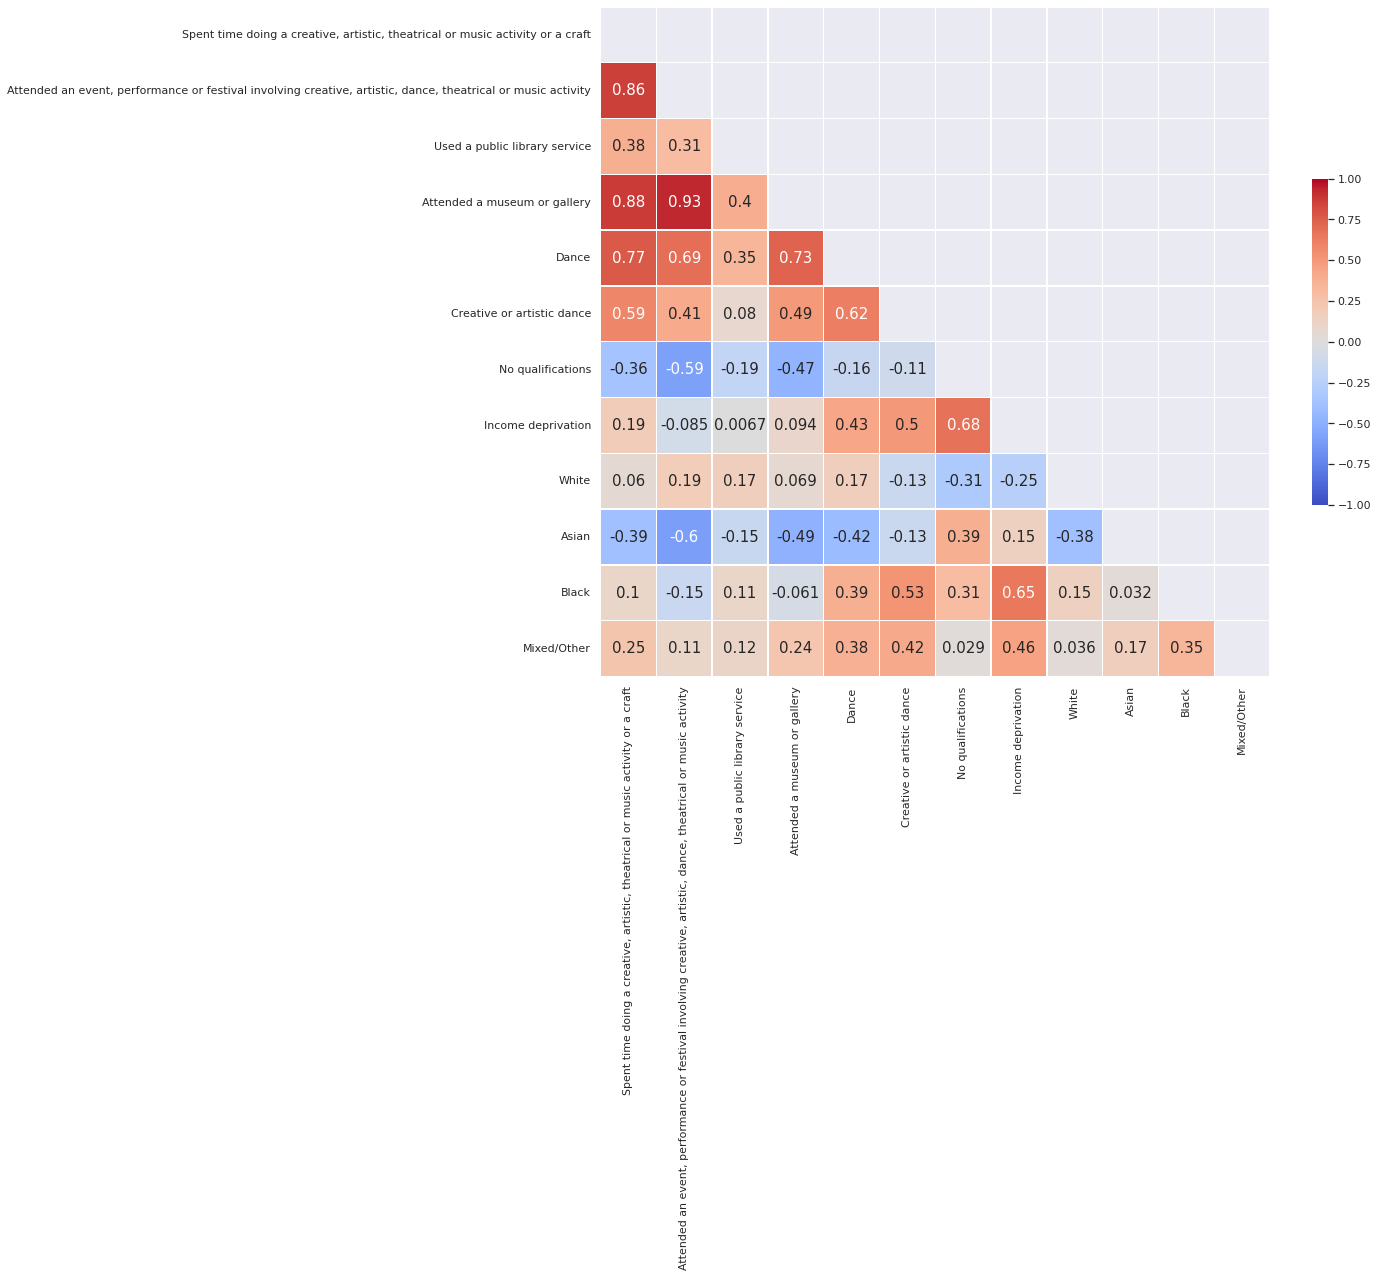

In [32]:
mask = np.zeros_like(correlation_data, dtype=np.bool) #ignores the top triangle of the correlation matrix 
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(correlation_data,mask = mask, cmap="coolwarm", square = True, linewidths = .5, cbar_kws = {'shrink': .4}, vmin = -1, vmax = 1, annot = True, annot_kws = {'size': 15})

In [50]:
f, ax = plt.subplots(figsize=(15, 15)) #sets the figure size
heatmap = sns.heatmap(corr6,mask = mask,  #ignores any invalid values 
cmap=”coolwarm" #sets the colour
 square = True,  #sets the shape 
 linewidths = .5,  #sets the width of the lines
cbar_kws = {'shrink': .4},  #sets the label size 
vmin = -1, vmax = 1, #sets the minimum and maximum colour bar value
annot = True, #sets the annotations for the values in the correlation matrix 
 annot_kws = {'size': 15}) #sets the annotation size

SyntaxError: ignored